<a href="https://colab.research.google.com/github/allenwang2333/clip-image-classification/blob/main/clip_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!pip install scipy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 41.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [35]:
from PIL import Image
import requests
from transformers import AutoImageProcessor, CLIPForImageClassification
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Resize
import matplotlib.pyplot as plt
import scipy 

from torch.utils.data import DataLoader

In [38]:
transform = Compose([
    ToTensor(),
    Resize((224, 224))
])

dataset = datasets.Caltech101(
    root="data",
    download=False,
    transform=transform,
)



train_data, val_data, test_data = torch.utils.data.random_split(dataset, [len(dataset)*0.8, len(dataset)*0.1, len(dataset)*0.1])

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])
torch.Size([3, 224, 224])


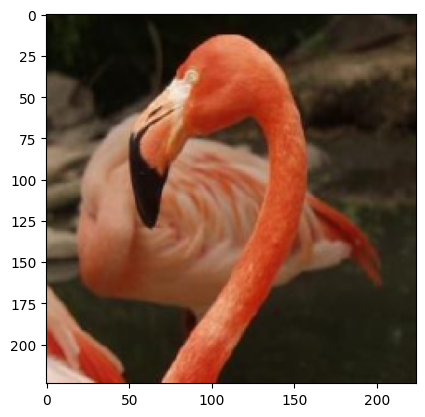

In [40]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)
train_features, train_label = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_label.size()}")
img = train_features[0]
plt.imshow(img.permute(1, 2, 0)) # Convert from CHW to HWC